In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply

In [2]:
crops = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-04-18/founder_crops.csv")
crops.shape

(4490, 24)

## What is Meant by Founder's Crops?

Founder crops are plants that were first domesticated and cultivated by humans for food or other purposes. These crops were the foundation of early human civilizations and played a significant role in shaping human societies and cultures.

In [5]:
# Get an overview of the data
crops.head(2)

,source,source_id,source_site_name,site_name,latitude,longitude,phase,phase_description,phase_code,age_start,...,reference,taxon_detail,taxon,genus,family,category,founder_crop,edibility,grass_type,legume_type
0,ORIGINS,16433–16433,Ayn Abu Nukhayla,Ayn Abu Nakhayla,29.84,35.24,PPNB,NaN,AANU PPNB,9578,...,HenryEtal03,Gypsophila sp.,"Gypsophila spp. (incl. elegans, obionica, pilosa)",Gypsophila,Caryophillaceae,Wild plants,NaN,NaN,NaN,NaN
1,ORIGINS,12007–12249,Abu Hureyra,Abu Hureyra,35.87,38.40,Abu Hureyra 1 (epipalaeolithic) phase 1,Dates approximated from Colledge & Conolly 2010,ABHU Epip1,13096,...,MooreEtal2000,Alyssum sp.,Alyssum spp. (incl. damascenus),Alyssum,Brassicaceae,Wild plants,NaN,NaN,NaN,NaN


In [5]:
crops.describe()

,latitude,longitude,age_start,age_end,n,prop
count,4490.000000,4490.000000,4490.000000,4490.000000,4.490000e+03,4.490000e+03
mean,34.791599,38.313618,8923.893764,8037.403118,3.212423e+04,3.915013e-02
std,2.320095,4.074884,2184.591963,2592.281525,1.911120e+06,1.092683e-01
min,29.840000,30.070000,5050.000000,1950.000000,0.000000e+00,7.846381e-09
25%,33.290000,35.655155,7350.000000,5750.000000,2.000000e+00,8.090610e-04
50%,35.220000,38.150000,9250.000000,8597.000000,8.000000e+00,4.975124e-03
75%,36.430000,39.450000,10450.000000,9850.000000,4.200000e+01,2.014501e-02
max,39.850000,48.500000,14111.000000,12984.000000,1.273362e+08,1.000000e+00


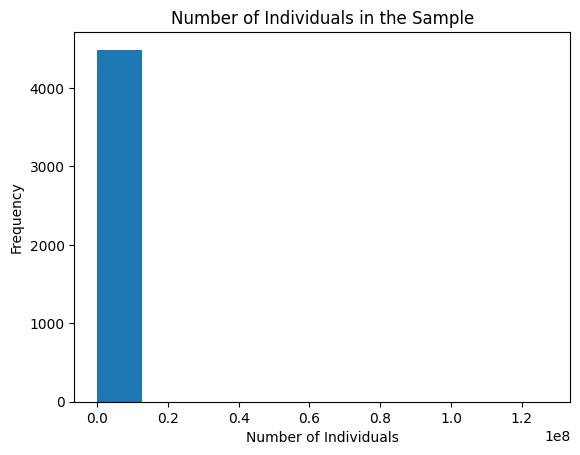

In [8]:
plt.hist(crops['n'])
plt.title('Number of Individuals in the Sample')
plt.xlabel('Number of Individuals')
plt.ylabel('Frequency')
plt.show()

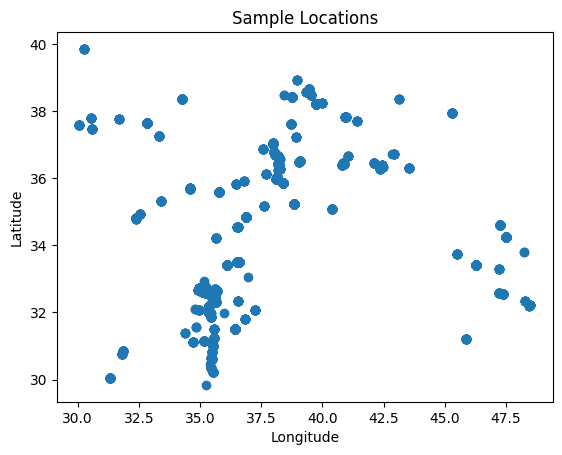

In [9]:
# Plot a scatter plot of latitude and longitude
plt.scatter(crops['longitude'], crops['latitude'])
plt.title('Sample Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

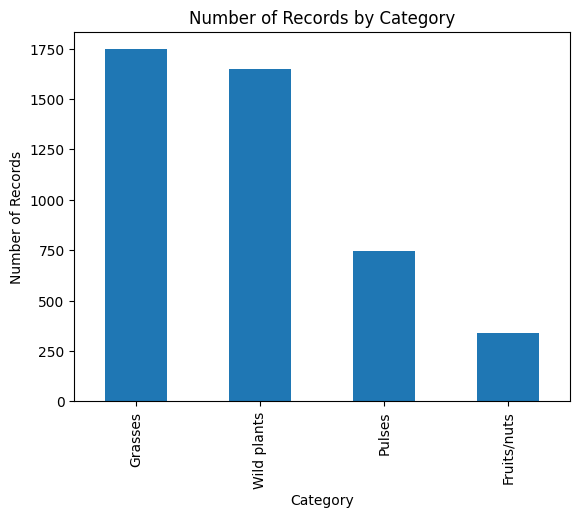

In [11]:
# Plot a bar chart of the number of records by category
crops['category'].value_counts().plot(kind='bar')
plt.title('Number of Records by Category')
plt.xlabel('Category')
plt.ylabel('Number of Records')
plt.show()

In [ ]:
import folium
# Load the CSV file into a Pandas DataFrame
# df = pd.read_csv('founder_crops.csv')

# Create a map centered on the mean latitude and longitude
map = folium.Map(location=[crops['latitude'].mean(), crops['longitude'].mean()], zoom_start=2)

# Add a marker for each sample location
for index, row in crops.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['founder_crop']).add_to(map)

# Display the map
map


In [15]:
import plotly.express as px

fig = px.scatter(crops, x="age_start", y="prop", color="founder_crop",
                 title="Proportion vs. Age by Crop", hover_data=["taxon_detail"])
fig.update_layout(xaxis_title="Age (years BP)", yaxis_title="Proportion", legend_title="Crop")
fig.show()


In [23]:
# Load data from CSV file
# df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-04-18/founder_crops.csv")

# Generate summary statistics for numerical columns
summary_stats = crops.describe()
print(summary_stats)


          latitude    longitude     age_start       age_end             n   
count  4490.000000  4490.000000   4490.000000   4490.000000  4.490000e+03  \
mean     34.791599    38.313618   8923.893764   8037.403118  3.212423e+04   
std       2.320095     4.074884   2184.591963   2592.281525  1.911120e+06   
min      29.840000    30.070000   5050.000000   1950.000000  0.000000e+00   
25%      33.290000    35.655155   7350.000000   5750.000000  2.000000e+00   
50%      35.220000    38.150000   9250.000000   8597.000000  8.000000e+00   
75%      36.430000    39.450000  10450.000000   9850.000000  4.200000e+01   
max      39.850000    48.500000  14111.000000  12984.000000  1.273362e+08   

               prop  
count  4.490000e+03  
mean   3.915013e-02  
std    1.092683e-01  
min    7.846381e-09  
25%    8.090610e-04  
50%    4.975124e-03  
75%    2.014501e-02  
max    1.000000e+00  


In [24]:

# Generate frequency table for 'category' column
category_counts = crops['category'].value_counts()
print(category_counts)


category
Grasses        1746
Wild plants    1650
Pulses          747
Fruits/nuts     340
Unknown           7
Name: count, dtype: int64


In [25]:
# Generate cross-tabulation table for 'category' and 'family' columns
crosstab = pd.crosstab(crops['category'], crops['family'])
print(crosstab)


family       Aizoaceae  Amaranthaceae  Anacardiaceae  Apiaceae  Araceae   
category                                                                  
Fruits/nuts          0              0            109         0        0  \
Grasses              0              0              0         0        0   
Pulses               0              0              0         0        0   
Unknown              0              0              0         0        0   
Wild plants         15             70              0        18        2   

family       Asparagaceae  Asphodelaceae  Asteraceae  Boraginaceae   
category                                                             
Fruits/nuts             0              0           0             0  \
Grasses                 0              0           0             0   
Pulses                  0              0           0             0   
Unknown                 0              0           0             0   
Wild plants            46              4          66  

In [26]:

# Generate pivot table for 'category' and 'family' columns, computing the mean value of 'n'
pivot_table = pd.pivot_table(crops, values='n', index='category', columns='family', aggfunc='mean')
print(pivot_table)

family       Aizoaceae  Amaranthaceae  Anacardiaceae  Apiaceae  Araceae   
category                                                                  
Fruits/nuts        NaN            NaN     619.309083       NaN      NaN  \
Grasses            NaN            NaN            NaN       NaN      NaN   
Pulses             NaN            NaN            NaN       NaN      NaN   
Unknown            NaN            NaN            NaN       NaN      NaN   
Wild plants      865.6      46.232143            NaN  6.444444      1.5   

family       Asparagaceae  Asphodelaceae  Asteraceae  Boraginaceae   
category                                                             
Fruits/nuts           NaN            NaN         NaN           NaN  \
Grasses               NaN            NaN         NaN           NaN   
Pulses                NaN            NaN         NaN           NaN   
Unknown               NaN            NaN         NaN           NaN   
Wild plants     70.478261           8.25   30.306818  

In [28]:
from IPython.display import HTML

# Generate pivot table for 'category' and 'family' columns, computing the mean value of 'n'
pivot_table = pd.pivot_table(df, values='n', index='category', columns='family', aggfunc='mean')

# Create HTML table with scrollbar
table = "<div style='overflow-x: scroll;'><table>{}</table></div>".format(pivot_table.to_html())

# Display HTML table
HTML(table)


family,Aizoaceae,Amaranthaceae,Anacardiaceae,Apiaceae,Araceae,Asparagaceae,Asphodelaceae,Asteraceae,Boraginaceae,Brassicaceae,Cannabaceae,Capparaceae,Caprifoliaceae,Caryophillaceae,Caryophyllaceae,Chenopodiaceae,Cistaceae,Convolvulaceae,Cornaceae,Cucurbitaceae,Cupressaceae,Cuscutaceae,Cyperaceae,Equisetaceae,Euphorbiaceae,Fabaceae,Fagaceae,Frankeniaceae,Geraniaceae,Hypericaceae,Juglandaceae,Juncaceae,Lamiaceae,Liliaceae,Linaceae,Malvaceae,Moraceae,Nitrariaceae,Oleaceae,Papaveraceae,Phoeniaceae,Pinaceae,Plantaginaceae,Poaceae,Polygonaceae,Portulacaceae,Potamogetonaceae,Primulaceae,Punicaceae,Ranunculaceae,Resedaceae,Rosaceae,Rubiaceae,Ruppiaceae,Scrophulariaceae,Solanaceae,Tamaricaceae,Thymelaea,Urticaceae,Verbenaceae,Violaceae,Vitaceae,Zygophyllaceae
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fruits/nuts,NaN,NaN,619.309083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.575758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,34.614286,NaN,NaN,NaN,1.5,NaN,34.000000,NaN,NaN,NaN,211.772059,NaN,10.265714,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,114.770678,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,28.411765,NaN
Grasses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.295757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pulses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.785841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wild plants,865.6,46.232143,NaN,6.444444,1.5,70.478261,8.25,30.306818,118.107798,1.072677e+06,2346.07,3.000000,5.617647,29.754364,15.210526,123.116883,3577.088235,88.0475,1.0,16.375,NaN,2.0,125.978824,2.0,2.861111,NaN,NaN,236.0,69.962963,6.0,NaN,2477.5,41.454545,132.0,49.216283,29.988732,NaN,2.0,NaN,15.416667,NaN,NaN,32.804878,NaN,175.981419,10.0,2.0,21.430294,NaN,14.581818,5.142857,50.800000,24.910632,1.0,4.888889,95.638889,NaN,12.485294,1.0,19.2,1.0,NaN,12.166667


In [29]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=crops['longitude'],
    y=crops['latitude'],
    mode='markers',
    marker=dict(
        size=df['prop']*50, # marker size is proportional to proportion of sample containing crop
        color='blue',
        opacity=0.3
    ),
    hovertemplate=
        '<b>Site Name:</b> %{customdata[0]}<br>' +
        '<b>Founders Crop:</b> %{customdata[1]}<br>' +
        '<b>Proportion:</b> %{customdata[2]:.2f}<br>' +
        '<b>Latitude:</b> %{y:.2f}<br>' +
        '<b>Longitude:</b> %{x:.2f}<br>',
    customdata=df[['site_name', 'founder_crop', 'prop']]
))

fig.update_layout(
    title='Distribution of Samples by Latitude and Longitude',
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)

fig.show()


In [31]:
# import plotly.graph_objects as go

category_counts = crops['category'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=category_counts.index,
    values=category_counts.values
)])

fig.update_layout(
    title='Proportion of Samples in Each Category'
)

fig.show()


In [35]:


fig = px.scatter(crops, x='longitude', y='latitude', color='founder_crop')

fig.update_layout(
    title='Sampled Crops by Latitude and Longitude',
    xaxis_title='Longitude',
    yaxis_title='Latitude'
)

fig.show()


In [37]:
crop_hierarchy = crops.groupby(['family', 'category', 'founder_crop']).size().reset_index(name='count')

fig = px.sunburst(
    crop_hierarchy,
    path=['family', 'category', 'founder_crop'],
    values='count',
    color='category'
)

fig.update_layout(
    title='Crops by Family and Category'
)

fig.show()
